# METEOROLOGICAL DATA PRESENTATION
## Numerical and Graphical Summaries

This notebook presents a comprehensive exploratory analysis of the meteorological dataset with detailed numerical and graphical summaries.


### 1. DATASET INTRODUCTION

In this section, we will study the dataset, the different categories, the size of the dataset, etc.


In [18]:
# Data loading
data_weather <- read.table("data/donnees-synop-essentielles-omm.csv",
                        header=TRUE,
                        sep=";",
                        quote = "\"") # treats text between "..." as a single field, even if it contains ;


In [19]:
# General dataset overview
head(data_weather)
dim(data_weather)
# summary(data_weather) J'enlève pour éviter d'afficher trop d'information

,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,⋯,Altitude,communes..name.,communes..code.,EPCI..name.,EPCI..code.,department..name.,department..code.,region..name.,region..code.,mois_de_l_annee
,<int>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,7181,2016-07-12T11:00:00+02:00,101410,-30,8,230,2.9,293.35,286.55,65,⋯,336,Thuilley-aux-Groseilles,54523,CC du Pays de Colombey et du Sud Toulois,245400510,Meurthe-et-Moselle,54,Grand Est,44,7
2,81405,2017-01-08T07:00:00+01:00,101140,-140,8,240,0.5,297.25,296.25,94,⋯,4,Matoury,97307,CA du Centre Littoral,249730045,Guyane,973,Guyane,3,1
3,7627,2017-01-08T13:00:00+01:00,103380,-40,8,30,2.1,277.55,269.75,57,⋯,414,Lorp-Sentaraille,09289,CC Couserans-Pyrénées,200067940,Ariège,09,Occitanie,76,1
4,78894,2017-01-09T13:00:00+01:00,101760,0,NA,100,2.3,298.15,291.35,66,⋯,44,,,,NA,,,,NA,1
5,7020,2017-01-12T13:00:00+01:00,100580,-710,8,210,11.9,282.05,280.15,88,⋯,6,La Hague,50041,CA du Cotentin,200067205,Manche,50,Normandie,28,1
6,7280,2017-12-23T13:00:00+01:00,103830,-10,0,10,2.7,280.75,278.35,85,⋯,219,Ouges,21473,Dijon Métropole,242100410,Côte-d'Or,21,Bourgogne-Franche-Comté,27,12


[1] 1719567      82

**Main observations:**
- Large dataset size: dataframe with 82 variables and 1,719,567 observations
- Numerical summary of all numerical data (summary doesn't provide information for string variables like station names, regions, etc.)


In [ ]:
# Display of variable labels
names_df <- data.frame(
    index = seq_along(colnames(data_weather)),
    name = colnames(data_weather)
)
print(names_df)

   index                                                      name
1      1                                            ID.OMM.station
2      2                                                      Date
3      3                                    Pression.au.niveau.mer
4      4                         Variation.de.pression.en.3.heures
5      5                             Type.de.tendance.barométrique
6      6                             Direction.du.vent.moyen.10.mn
7      7                               Vitesse.du.vent.moyen.10.mn
8      8                                               Température
9      9                                            Point.de.rosée
10    10                                                  Humidité
11    11                                    Visibilité.horizontale
12    12                                             Temps.présent
13    13                                             Temps.passé.1
14    14                                             Temps.pas

**Variable description:**
We have various variables providing a lot of information about the weather at a given station.


### 2. EXTRACTION OF SIMILAR DATA GROUPS

Extraction of data related to temperature, pressure, wind, precipitation, snow.


In [11]:
# Selection of temperature-related values (first in Kelvin, second in Celsius)
temperature_data <- data_weather[,c(1:2, 8, 25:29)] 
temperature_data_C <- data_weather[,c(1:2, 65:70)] 

# Sort by ascending date
temperature_data <- temperature_data[order(temperature_data$Date), ]
temperature_data_C <- temperature_data_C[order(temperature_data_C$Date), ]

# Reorganize the index
rownames(temperature_data) <- NULL
rownames(temperature_data_C) <- NULL
head(temperature_data)
head(temperature_data_C)


,ID.OMM.station,Date,Température,Température.minimale.sur.12.heures,Température.minimale.sur.24.heures,Température.maximale.sur.12.heures,Température.maximale.sur.24.heures,Température.minimale.du.sol.sur.12.heures
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7790,2015-08-04T02:00:00+02:00,294.85,NA,NA,NA,NA,NA
2,7761,2015-08-04T02:00:00+02:00,295.15,NA,NA,NA,NA,NA
3,7020,2015-08-04T02:00:00+02:00,288.85,NA,NA,NA,NA,NA
4,7240,2015-08-04T02:00:00+02:00,292.85,NA,NA,NA,NA,291.55
5,81415,2015-08-04T02:00:00+02:00,297.55,NA,NA,NA,NA,NA
6,7110,2015-08-04T02:00:00+02:00,286.35,NA,NA,NA,NA,282.85


,ID.OMM.station,Date,Température...C.,Température.minimale.sur.12.heures...C.,Température.minimale.sur.24.heures...C.,Température.maximale.sur.12.heures...C.,Température.maximale.sur.24.heures...C.,Température.minimale.du.sol.sur.12.heures..en..C.
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7790,2015-08-04T02:00:00+02:00,21.7,NA,NA,NA,NA,NA
2,7761,2015-08-04T02:00:00+02:00,22.0,NA,NA,NA,NA,NA
3,7020,2015-08-04T02:00:00+02:00,15.7,NA,NA,NA,NA,NA
4,7240,2015-08-04T02:00:00+02:00,19.7,NA,NA,NA,NA,18.4
5,81415,2015-08-04T02:00:00+02:00,24.4,NA,NA,NA,NA,NA
6,7110,2015-08-04T02:00:00+02:00,13.2,NA,NA,NA,NA,9.7


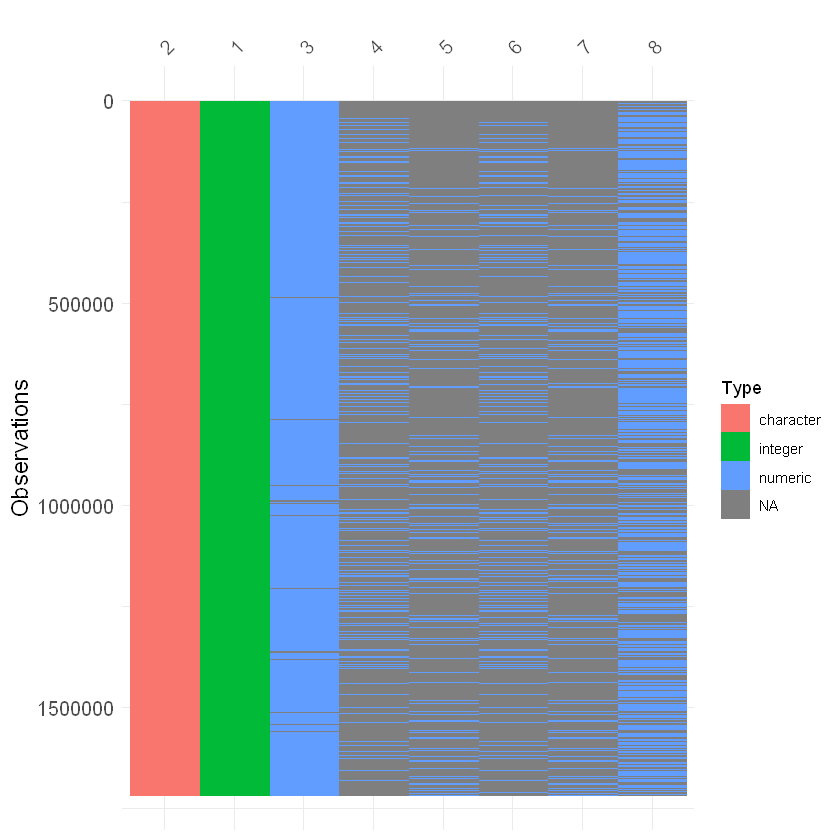

In [ ]:
# Visualization of missing data for temperature variables (with column numbers)
library(visdat)
library(ggplot2)
col_numbers <- seq_along(colnames(temperature_data))
colnames(temperature_data) <- as.character(col_numbers)
vis_dat(
  temperature_data, 
  warn_large_data = FALSE
) +
  ggplot2::theme(
    axis.text.x = ggplot2::element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = ggplot2::element_text(size = 12),
    axis.title = ggplot2::element_text(size = 14),
    plot.title = ggplot2::element_text(size = 16, face = "bold")
  )

**Correspondence between column number and variable name for `temperature_data`:**

| Column Number | Variable Name |
|---------------|---------------|
| 1             | `ID.OMM.station` |
| 2             | `Date`           |
| 3             | `Température`    |
| 4             | `Température.minimale.sur.12.heures` |
| 5             | `Température.minimale.sur.24.heures` |
| 6             | `Température.maximale.sur.12.heures` |
| 7             | `Température.maximale.sur.24.heures` |


In [13]:
# Selection of pressure-related values
pressure_data <- data_weather[, c(1:5, 21:22)]

# Sort by ascending date
pressure_data <- pressure_data[order(pressure_data$Date), ]

# Reorganize the index
row.names(pressure_data) <- NULL
head(pressure_data)


,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Pression.station,Niveau.barométrique
,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,7790,2015-08-04T02:00:00+02:00,101570,30,1,101430,NA
2,7761,2015-08-04T02:00:00+02:00,101600,50,0,101500,NA
3,7020,2015-08-04T02:00:00+02:00,101390,-10,7,101130,NA
4,7240,2015-08-04T02:00:00+02:00,101410,130,3,100110,NA
5,81415,2015-08-04T02:00:00+02:00,101370,270,3,100160,NA
6,7110,2015-08-04T02:00:00+02:00,101490,40,1,100350,NA


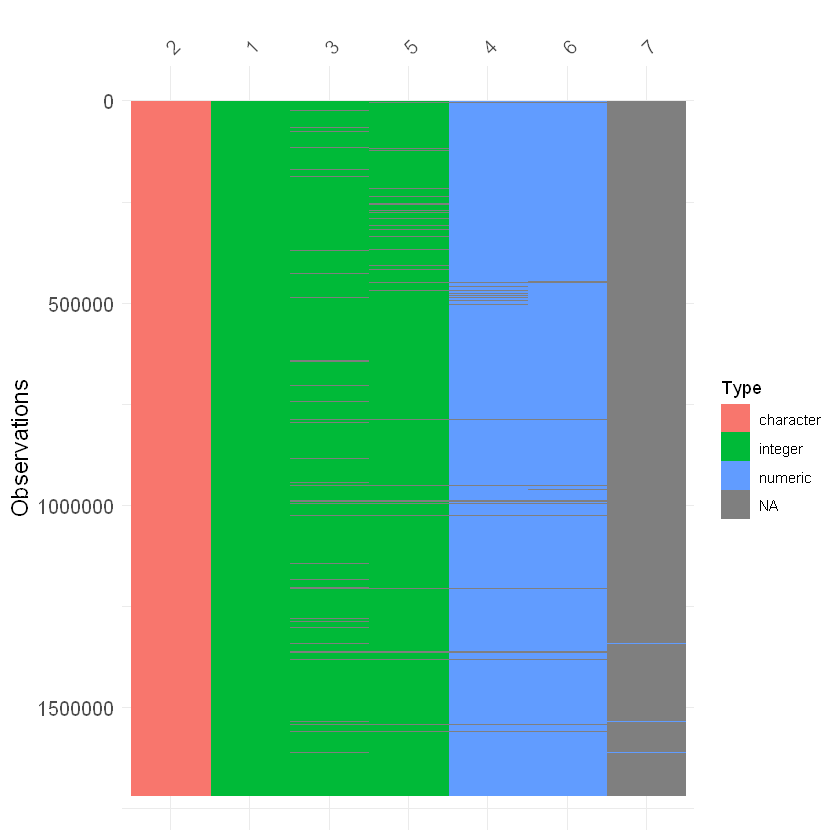

In [14]:
# Chart to visualize missing pressure data with column numbers as labels
library(visdat)
library(ggplot2)
col_numbers <- seq_along(colnames(pressure_data))
colnames(pressure_data) <- as.character(col_numbers)
vis_dat(
  pressure_data, 
  warn_large_data = FALSE
) +
  ggplot2::theme(
    axis.text.x = ggplot2::element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = ggplot2::element_text(size = 12),
    axis.title = ggplot2::element_text(size = 14),
    plot.title = ggplot2::element_text(size = 16, face = "bold")
  )


**Correspondence between column number and variable name for `pressure_data`:**

| Column Number | Variable Name |
|---------------|---------------|
| 1             | `ID.OMM.station` |
| 2             | `Date`           |
| 3             | `Pression.au.niveau.mer` |
| 4             | `Variation.de.pression.en.3.heures` |
| 5             | `Type.de.tendance.barométrique` |
| 6             | `Pression.station` |
| 7             | `Niveau.barométrique` |


In [15]:
# Selection of precipitation-related values
precipitation_data <- data_weather[, c(1:2, 10, 39:43)]

# Sort by ascending date
precipitation_data <- precipitation_data[order(precipitation_data$Date), ]

# Reorganize the index
row.names(precipitation_data) <- NULL
head(precipitation_data)


,ID.OMM.station,Date,Humidité,Précipitations.dans.la.dernière.heure,Précipitations.dans.les.3.dernières.heures,Précipitations.dans.les.6.dernières.heures,Précipitations.dans.les.12.dernières.heures,Précipitations.dans.les.24.dernières.heures
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7790,2015-08-04T02:00:00+02:00,68,0.0,0.0,0.0,0.0,0.0
2,7761,2015-08-04T02:00:00+02:00,86,0.0,0.0,0.0,0.0,0.0
3,7020,2015-08-04T02:00:00+02:00,88,0.0,-0.1,0.2,4.0,4.2
4,7240,2015-08-04T02:00:00+02:00,81,-0.1,-0.1,-0.1,-0.1,-0.1
5,81415,2015-08-04T02:00:00+02:00,91,0.2,1.8,1.8,1.8,1.8
6,7110,2015-08-04T02:00:00+02:00,88,0.0,0.0,0.0,0.8,2.4


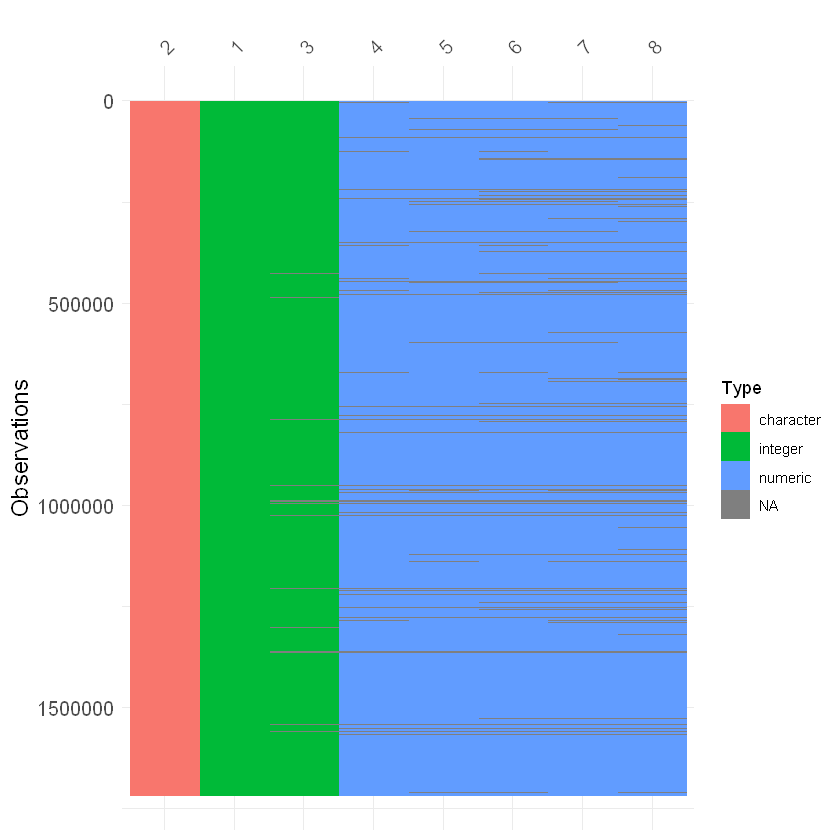

In [16]:
# Chart to visualize missing precipitation data with column numbers as labels
library(visdat)
library(ggplot2)
col_numbers <- seq_along(colnames(precipitation_data))
colnames(precipitation_data) <- as.character(col_numbers)
vis_dat(
  precipitation_data, 
  warn_large_data = FALSE
) +
  ggplot2::theme(
    axis.text.x = ggplot2::element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = ggplot2::element_text(size = 12),
    axis.title = ggplot2::element_text(size = 14),
    plot.title = ggplot2::element_text(size = 16, face = "bold")
  )


**Correspondence between column number and variable name for `precipitation_data`:**

| Column Number | Variable Name |
|---------------|---------------|
| 1             | `ID.OMM.station` |
| 2             | `Date`           |
| 3             | `Humidité` |
| 4             | `Précipitations.dans.la.dernière.heure` |
| 5             | `Précipitations.dans.la.dernière.3.heures` |
| 6             | `Précipitations.dans.la.dernière.6.heures` |
| 7             | `Précipitations.dans.la.dernière.12.heures` |
| 8             | `Précipitations.dans.la.dernière.24.heures` |


In [17]:
# Getting all the different stations
stations <- unique(temperature_data$ID.OMM.station)
stations


NULL

### PARTIE EN-DESSOUS J'AI PAS ENCORE FAIT LES MODIFS

### 3. DETAILED ANALYSIS OF AN EXAMPLE STATION (Station 7790)

Let's examine in detail the data from a specific station to understand the patterns.


In [21]:
# Analysis of station 7790
library(lubridate)
temperature_data_C_7790 <- temperature_data_C[temperature_data_C$ID.OMM.station == 7790,]
pressure_data_7790 <- pressure_data[pressure_data$ID.OMM.station == 7790,]
precipitation_data_7790 <- precipitation_data[precipitation_data$ID.OMM.station == 7790,]

# Date format conversion and verification of intervals (3, 6, 9, 12, 27 hours)
temperature_data_C_7790$DateTime <- ymd_hms(temperature_data_C_7790$Date)
pressure_data_7790$DateTime <- ymd_hms(pressure_data_7790$Date)
precipitation_data_7790$DateTime <- ymd_hms(precipitation_data_7790$Date)
diffs <- as.numeric(diff(temperature_data_C_7790$DateTime), units = "hours")
unique(diffs)
head(temperature_data_C_7790)
head(pressure_data_7790)
head(precipitation_data_7790)



Attachement du package : 'lubridate'


Les objets suivants sont masqués depuis 'package:base':

    date, intersect, setdiff, union




[1]  3  6 12  9 27

,ID.OMM.station,Date,Température...C.,Température.minimale.sur.12.heures...C.,Température.minimale.sur.24.heures...C.,Température.maximale.sur.12.heures...C.,Température.maximale.sur.24.heures...C.,Température.minimale.du.sol.sur.12.heures..en..C.,DateTime
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,7790,2015-08-04T02:00:00+02:00,21.7,NA,NA,NA,NA,NA,2015-08-04 00:00:00
67,7790,2015-08-04T05:00:00+02:00,21.5,NA,NA,NA,NA,NA,2015-08-04 03:00:00
113,7790,2015-08-04T08:00:00+02:00,24.3,NA,NA,NA,NA,NA,2015-08-04 06:00:00
194,7790,2015-08-04T11:00:00+02:00,32.2,NA,NA,NA,NA,NA,2015-08-04 09:00:00
261,7790,2015-08-04T14:00:00+02:00,30.8,NA,NA,NA,NA,NA,2015-08-04 12:00:00
288,7790,2015-08-04T17:00:00+02:00,30.4,NA,NA,NA,NA,NA,2015-08-04 15:00:00


1,2,3,4,5,6,7,DateTime
<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dttm>


1,2,3,4,5,6,7,8,DateTime
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>


#### 3.1 Temperature Analysis


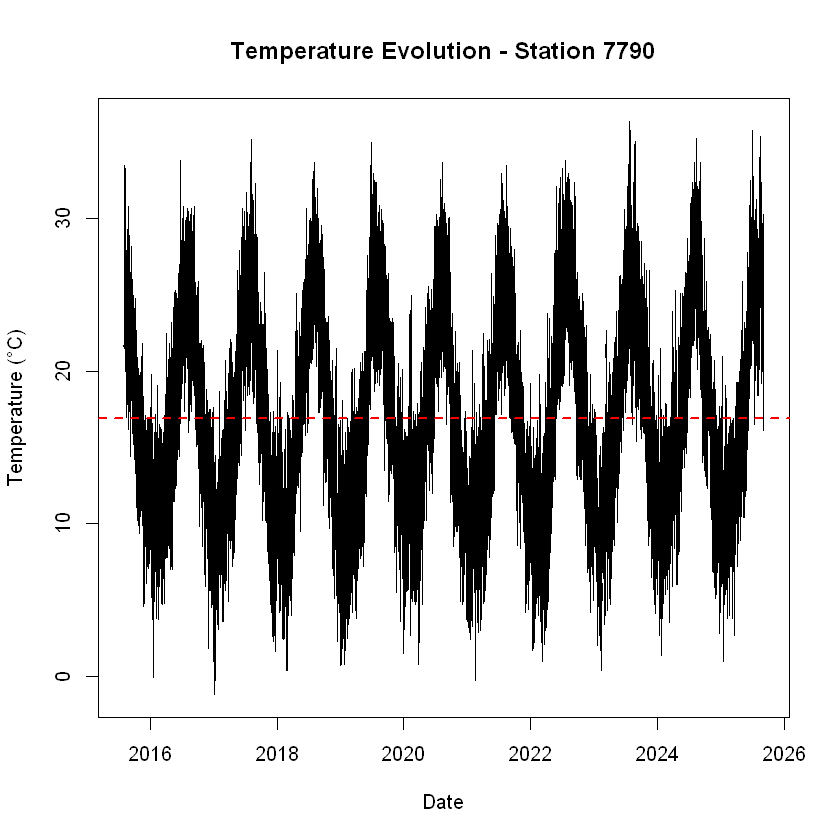

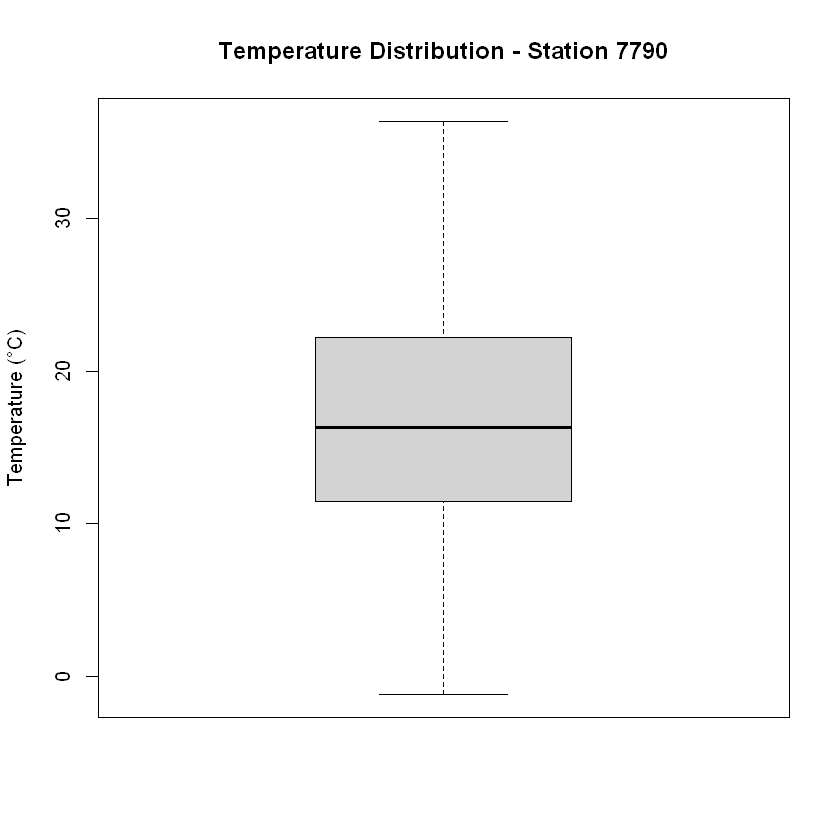

In [22]:
# Temperature visualization
par(bg = "white")
plot(temperature_data_C_7790$DateTime, 
    temperature_data_C_7790$`Température...C.`, 
    type = "l",
    xlab = "Date", 
    ylab = "Temperature (°C)", 
    main = "Temperature Evolution - Station 7790")

abline(h = mean(temperature_data_C_7790$`Température...C.`, na.rm = TRUE), col = "red", lwd = 2, lty = 2)

boxplot(temperature_data_C_7790$`Température...C.`, 
    ylab = "Temperature (°C)", 
    main = "Temperature Distribution - Station 7790")


#### 3.2 Pressure Analysis


Warning message in min(x):
"aucun argument trouvé pour min ; Inf est renvoyé"
Warning message in max(x):
"aucun argument pour max ; -Inf est renvoyé"
Warning message in min(x):
"aucun argument trouvé pour min ; Inf est renvoyé"
Warning message in max(x):
"aucun argument pour max ; -Inf est renvoyé"


ERROR: Error in plot.window(...): 'xlim' nécessite des valeurs finies


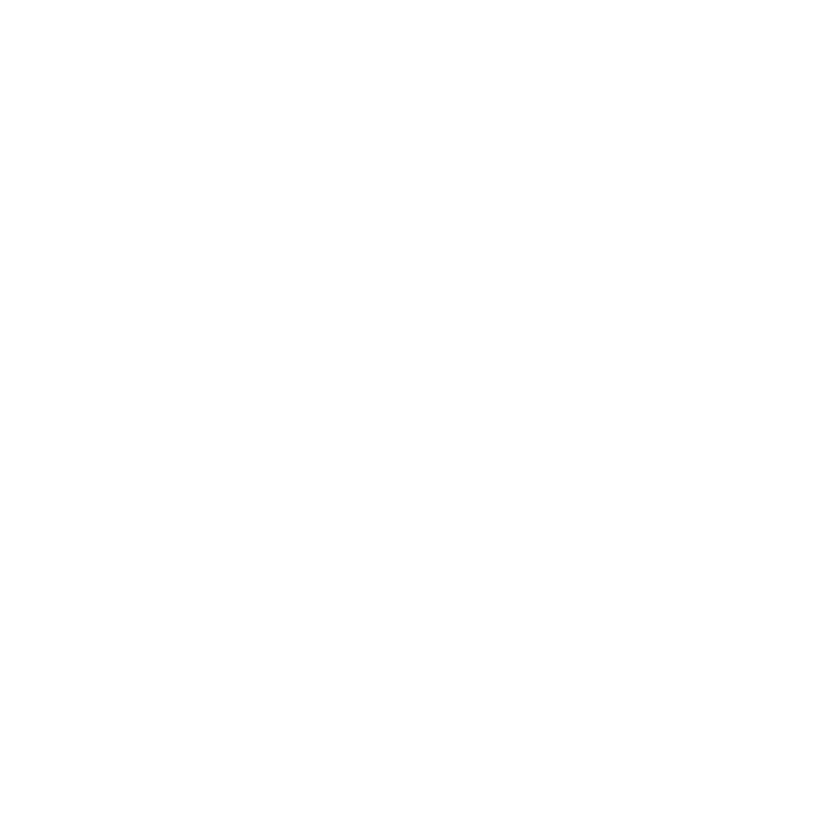

In [23]:
# Pressure visualization
par(bg = "white")
plot(pressure_data_7790$DateTime, 
    pressure_data_7790$Pression.station/100, 
    type = "l",
    xlab = "Date", 
    ylab = "Pressure (hPa)", 
    main = "Pressure Evolution - Station 7790")

boxplot(pressure_data_7790$Pression.station/100, 
    pressure_data_7790$Pression.au.niveau.mer/100,
    names = c("Station Pressure", "Sea Level Pressure"),
    col = c("red", "blue"),
    ylab = "Pressure (hPa)", 
    main = "Pressure Distribution - Station 7790")


#### 3.3 Precipitation and Humidity Analysis


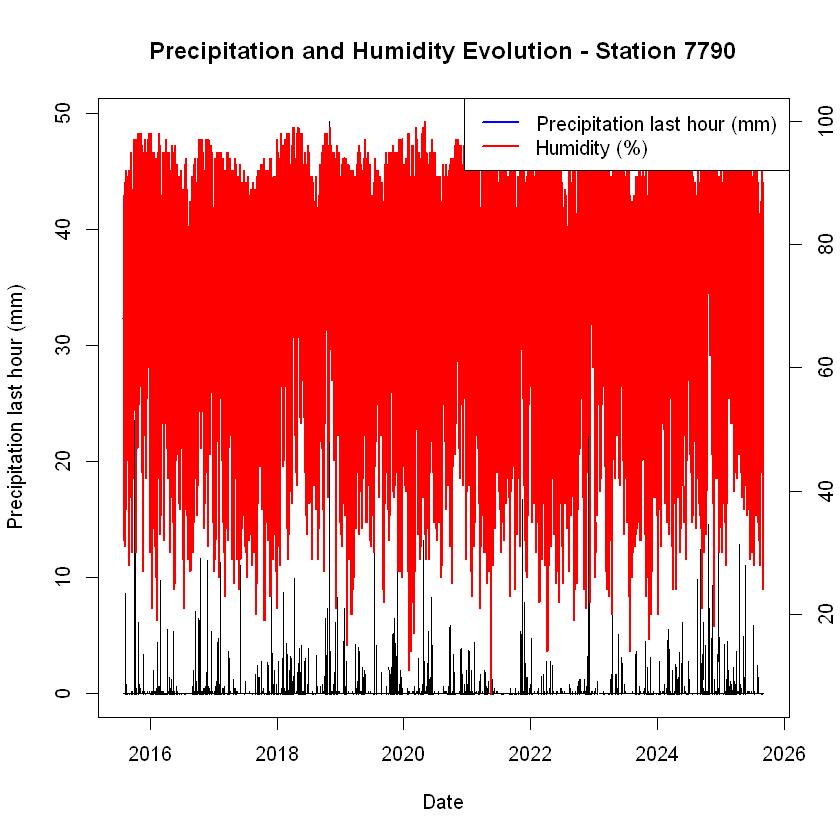

In [ ]:
# Precipitation and humidity visualization
par(bg = "white")
plot(precipitation_data_7790$DateTime, 
    precipitation_data_7790$Précipitations.dans.la.dernière.heure, 
    type = "l",
    xlab = "Date", 
    ylab = "Precipitation last hour (mm)", 
    main = "Precipitation and Humidity Evolution - Station 7790")

par(new = TRUE)
plot(precipitation_data_7790$DateTime, 
      precipitation_data_7790$Humidité, 
      type = "l", col = "red", lwd = 2, axes = FALSE, xlab = "", ylab = "")
axis(side = 4)  # y axis on the right
mtext("Humidity (%)", side = 4, line = 3)

legend("topright", legend = c("Precipitation last hour (mm)", "Humidity (%)"),
       col = c("blue", "red"), lwd = 2)


#### 3.4 Correlations between variables


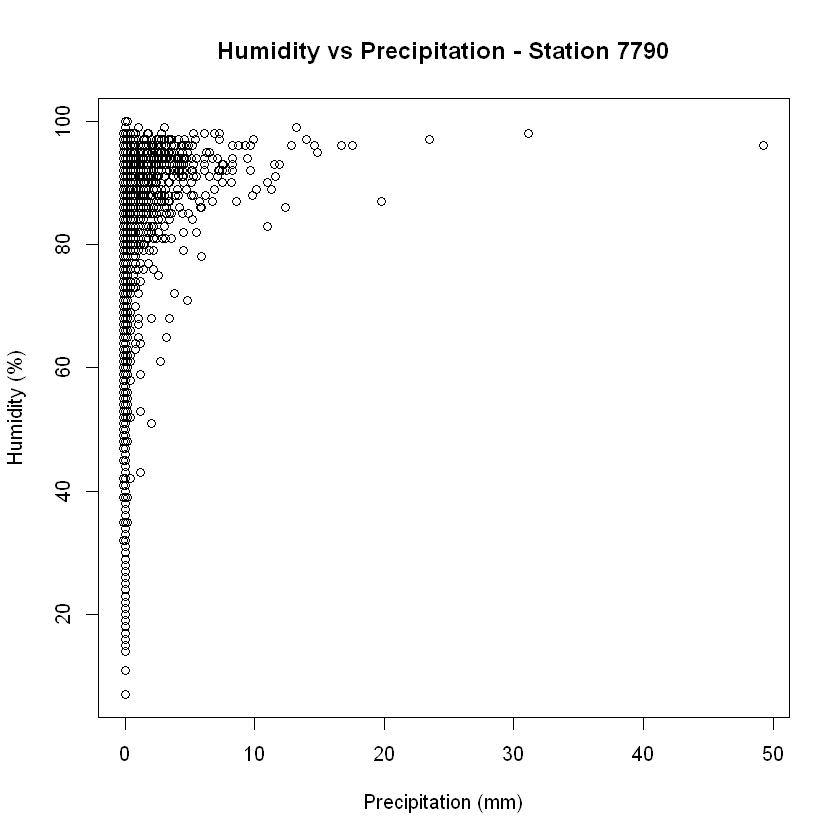

In [ ]:
# Humidity vs precipitation correlation
par(bg = "white")
plot(precipitation_data_7790$Précipitations.dans.la.dernière.heure, 
    precipitation_data_7790$Humidité,
    xlab = "Precipitation (mm)",
    ylab = "Humidity (%)",
    main = "Humidity vs Precipitation - Station 7790")


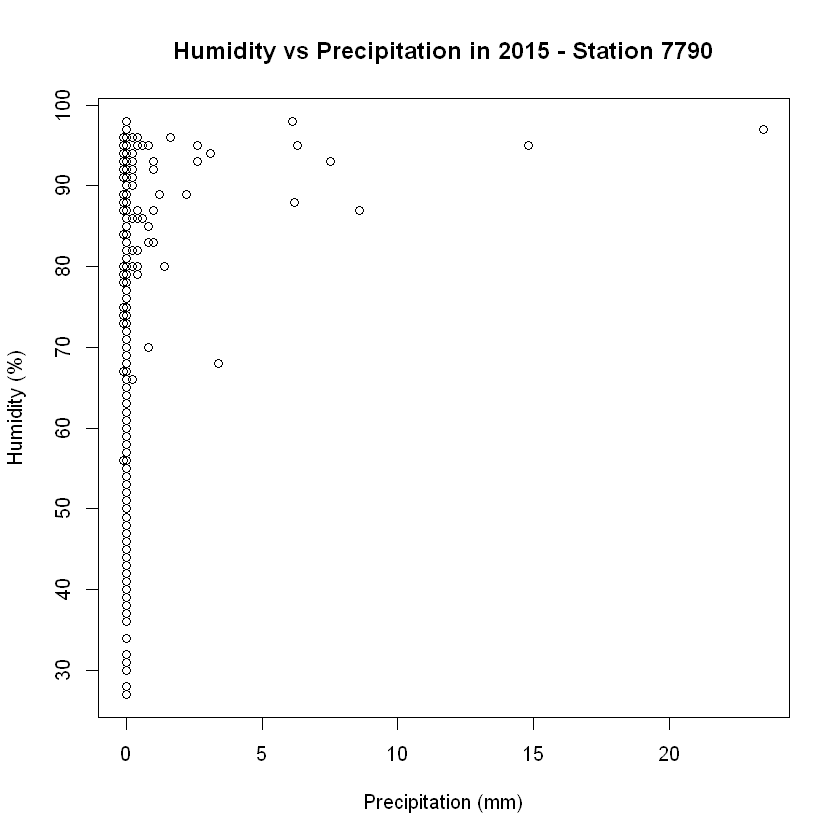

In [ ]:
# Analysis for year 2015 only
precipitation_data_7790_2015 <- precipitation_data_7790[format(precipitation_data_7790$DateTime, "%Y") == 2015,]

par(bg = "white")
plot(precipitation_data_7790_2015$Précipitations.dans.la.dernière.heure, 
    precipitation_data_7790_2015$Humidité,
    xlab = "Precipitation (mm)",
    ylab = "Humidity (%)",
    main = "Humidity vs Precipitation in 2015 - Station 7790")


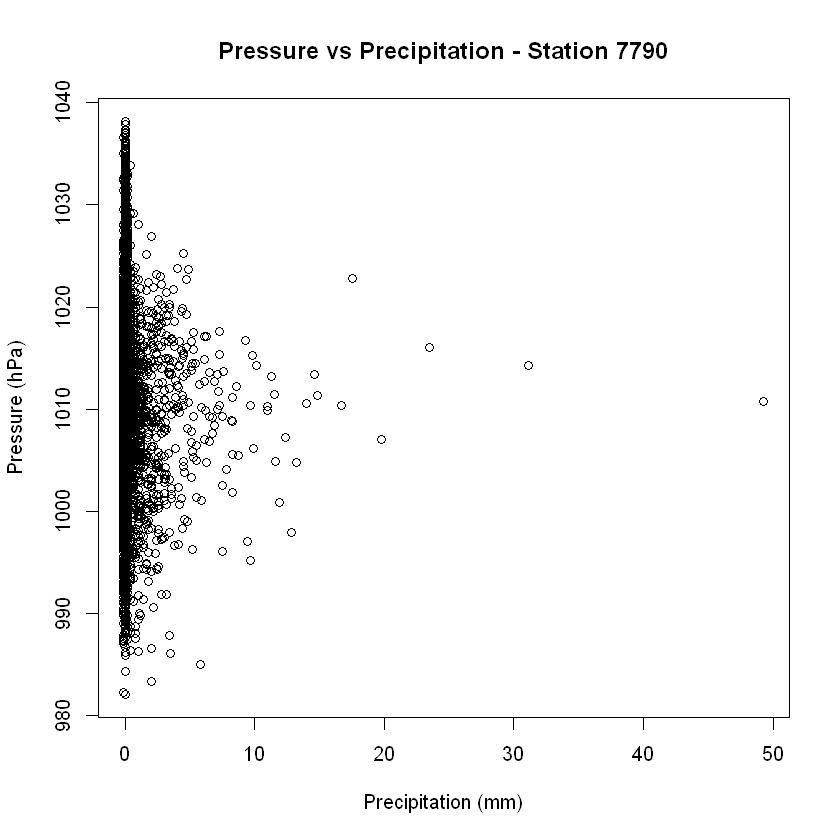

In [ ]:
# Pressure vs precipitation correlation
par(bg = "white")
plot(precipitation_data_7790$Précipitations.dans.la.dernière.heure, 
    pressure_data_7790$Pression.station/100,
    xlab = "Precipitation (mm)",
    ylab = "Pressure (hPa)",
    main = "Pressure vs Precipitation - Station 7790")


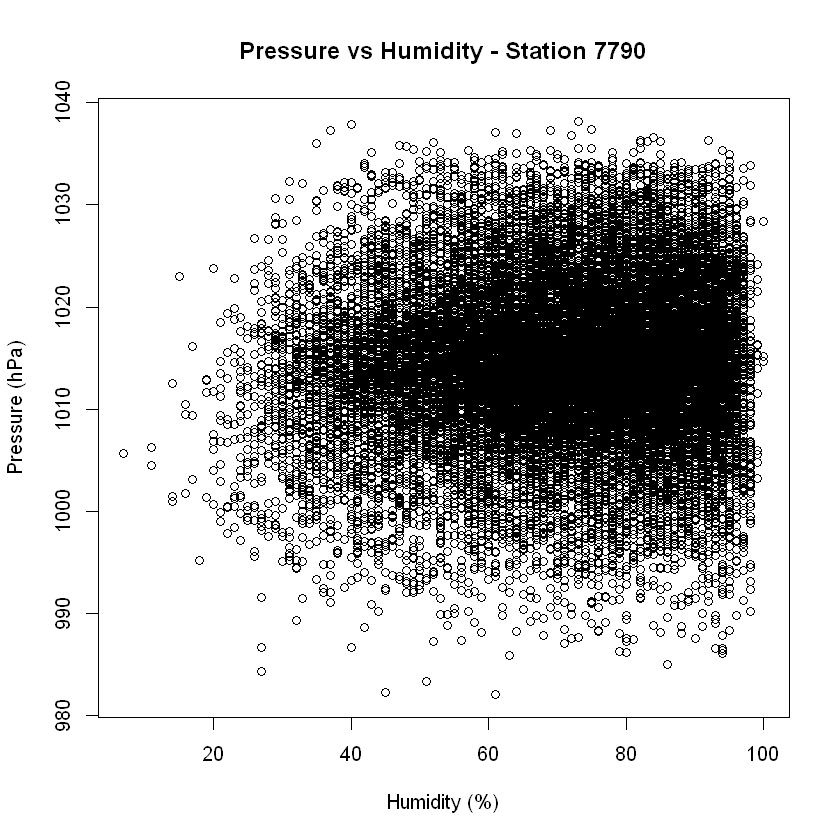

In [ ]:
# Pressure vs humidity correlation
par(bg = "white")
plot(precipitation_data_7790$`Humidité`, 
    pressure_data_7790$Pression.station/100,
    xlab = "Humidity (%)",
    ylab = "Pressure (hPa)",
    main = "Pressure vs Humidity - Station 7790")


### 4. GLOBAL ANALYSIS - AVERAGE TEMPERATURE ACROSS ALL STATIONS


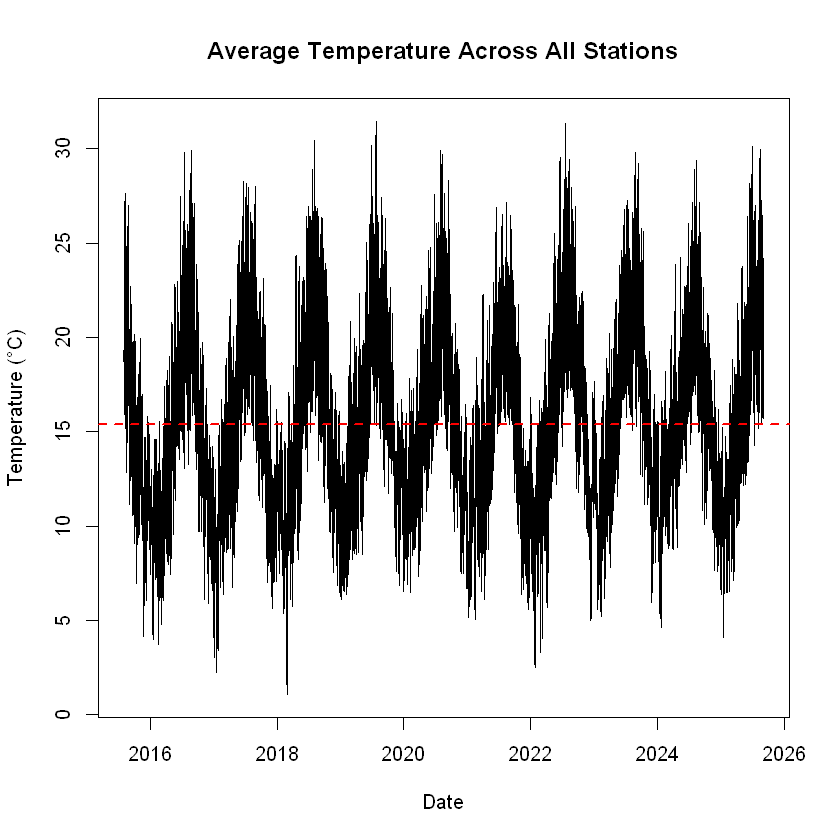

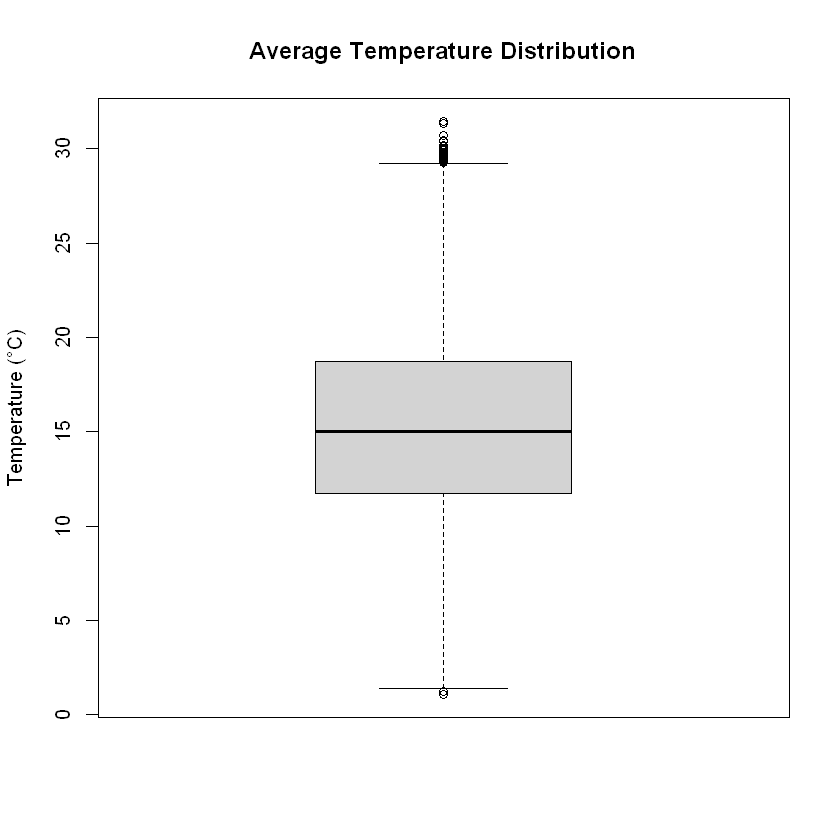

In [ ]:
# Date format conversion
temperature_data_C$DateTime <- ymd_hms(temperature_data_C$Date)

# Calculate average temperature by date
temperature_avg <- aggregate(`Température...C.` ~ DateTime, 
                             data = temperature_data_C, 
                             FUN = mean, 
                             na.rm = TRUE)

# Average temperature visualization
par(bg = "white")
plot(temperature_avg$DateTime, 
    temperature_avg$`Température...C.`, 
    type = "l",
    xlab = "Date", 
    ylab = "Temperature (°C)", 
    main = "Average Temperature Across All Stations")

abline(h = mean(temperature_avg$`Température...C.`, na.rm = TRUE), col = "red", lwd = 2, lty = 2)

boxplot(temperature_avg$`Température...C.`, 
    ylab = "Temperature (°C)", 
    main = "Average Temperature Distribution")


In [ ]:
# Average temperature by station across all dates
temperature_avg_station <- aggregate(`Température...C.` ~ ID.OMM.station, 
                             data = temperature_data_C, 
                             FUN = function(x) mean(x, na.rm = TRUE))

summary(temperature_avg_station)

# Example analysis of a specific station
station_id <- 89642
temps_station <- temperature_data_C$`Température...C.`[temperature_data_C$ID.OMM.station == station_id]
summary(temps_station)
data_weather$Nom[data_weather$ID.OMM.station == station_id]


 ID.OMM.station  Température...C.
 Min.   : 7005   Min.   :-10.98  
 1st Qu.: 7226   1st Qu.: 12.13  
 Median : 7599   Median : 13.40  
 Mean   :28291   Mean   : 15.87  
 3rd Qu.:61979   3rd Qu.: 17.01  
 Max.   :89642   Max.   : 28.25  

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -33.50  -16.50  -11.30  -10.98   -4.70    6.70       3 

[1] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
    [4] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
    [7] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [10] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [13] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [16] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [19] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [22] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [25] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [28] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [31] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [34] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [37] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [40] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [43] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [46] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [49] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [52] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [55] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [58] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [61] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [64] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [67] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [70] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [73] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [76] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [79] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [82] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [85] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [88] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [91] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [94] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [97] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [100] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [103] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [106] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [109] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [112] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [115] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [118] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [121] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [124] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [127] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [130] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [133] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [136] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [139] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [142] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [145] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [148] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [151] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [154] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [157] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [160] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [163] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [166] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [169] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [172] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [175] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [178] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [181] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [184] "DUMONT D'URVILLE" "DUMONT D'UR

### 5. DETAILED STATISTICAL SUMMARIES


In [ ]:
# Descriptive statistics for main meteorological variables
cat("=== DESCRIPTIVE STATISTICS ===\n\n")

# Temperature
cat("TEMPERATURE (in °C):\n")
temp_stats <- summary(temperature_data_C$`Température...C.`)
print(temp_stats)
cat("Standard deviation:", sd(temperature_data_C$`Température...C.`, na.rm = TRUE), "°C\n\n")

# Pressure
cat("STATION PRESSURE (in hPa):\n")
pressure_stats <- summary(pressure_data$Pression.station/100)
print(pressure_stats)
cat("Standard deviation:", sd(pressure_data$Pression.station/100, na.rm = TRUE), "hPa\n\n")

# Humidity
cat("HUMIDITY (in %):\n")
humidity_stats <- summary(precipitation_data$Humidité)
print(humidity_stats)
cat("Standard deviation:", sd(precipitation_data$Humidité, na.rm = TRUE), "%\n\n")

# Precipitation
cat("PRECIPITATION LAST HOUR (in mm):\n")
precip_stats <- summary(precipitation_data$Précipitations.dans.la.dernière.heure)
print(precip_stats)
cat("Standard deviation:", sd(precipitation_data$Précipitations.dans.la.dernière.heure, na.rm = TRUE), "mm\n")


=== DESCRIPTIVE STATISTICS ===

TEMPERATURE (in °C):
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -33.50    8.80   15.00   15.41   23.50   59.70   22176 
Standard deviation: 9.31943 °C

STATION PRESSURE (in hPa):
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  882.7   992.7  1007.7   999.7  1013.5  1049.3   33576 
Standard deviation: 22.889 hPa

HUMIDITY (in %):
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00   65.00   78.00   75.63   89.00  100.00   30674 
Standard deviation: 16.88129 %

PRECIPITATION LAST HOUR (in mm):
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -0.100   0.000   0.000   0.104   0.000  75.600   78388 
Standard deviation: 0.8012655 mm


### 6. DATA DISTRIBUTION ANALYSIS


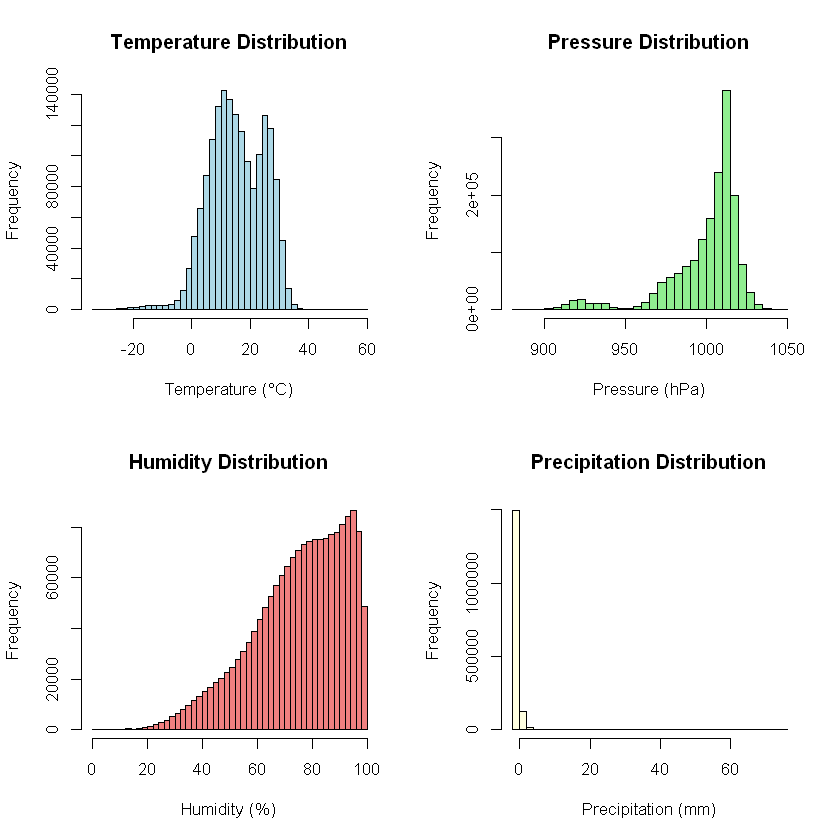

In [ ]:
# Histograms of main variables
par(mfrow = c(2, 2), bg = "white")

# Temperature histogram
hist(temperature_data_C$`Température...C.`, 
     main = "Temperature Distribution", 
     xlab = "Temperature (°C)", 
     col = "lightblue", 
     breaks = 50)

# Pressure histogram
hist(pressure_data$Pression.station/100, 
     main = "Pressure Distribution", 
     xlab = "Pressure (hPa)", 
     col = "lightgreen", 
     breaks = 50)

# Humidity histogram
hist(precipitation_data$Humidité, 
     main = "Humidity Distribution", 
     xlab = "Humidity (%)", 
     col = "lightcoral", 
     breaks = 50)

# Precipitation histogram
hist(precipitation_data$Précipitations.dans.la.dernière.heure, 
     main = "Precipitation Distribution", 
     xlab = "Precipitation (mm)", 
     col = "lightyellow", 
     breaks = 50)

par(mfrow = c(1, 1))  # Reset layout


### 7. CORRELATION MATRIX


In [ ]:
# Create a dataset with main numerical variables
correlation_data <- data.frame(
    Temperature = temperature_data_C$`Température...C.`,
    Pressure = pressure_data$Pression.station/100,
    Humidity = precipitation_data$Humidité,
    Precipitation = precipitation_data$Précipitations.dans.la.dernière.heure
)

# Calculate correlation matrix
correlation_matrix <- cor(correlation_data, use = "complete.obs")
print("Correlation Matrix:")
print(correlation_matrix)

# Correlation matrix visualization
library(corrplot)
corrplot(correlation_matrix, method = "color", type = "upper", 
         addCoef.col = "black", tl.cex = 0.8, number.cex = 0.8)


[1] "Correlation Matrix:"
              Temperature    Pressure   Humidity Precipitation
Temperature    1.00000000  0.21900754 -0.3682411    0.01328103
Pressure       0.21900754  1.00000000  0.0660568   -0.02016601
Humidity      -0.36824111  0.06605680  1.0000000    0.12954326
Precipitation  0.01328103 -0.02016601  0.1295433    1.00000000


ERROR: Error in library(corrplot): aucun package nommé 'corrplot' n'est trouvé


### 8. CONCLUSION

This exploratory analysis of meteorological data reveals:

1. **Dataset size**: 1,719,567 observations with 82 variables
2. **Main variables**: Temperature, pressure, humidity, precipitation
3. **Temporal patterns**: Seasonal evolution visible in temperature data
4. **Correlations**: Relationships between humidity and precipitation, pressure and weather conditions
5. **Distributions**: Statistical behavior of meteorological variables

These numerical and graphical summaries provide a solid foundation for the more in-depth statistical analyses that will follow.
